# Hough Line Transform
- <b><h2>Theory</h2></b>

<b>[Back Ground]</b><br>
평면에 두 점 (x1, y1)과 (x2, y2)을 m(기울기)와 b(편향)에 대한 식으로 바꿨을 때는 m과 b평면에서 직선이 두 개가 나온다.

![허프변환](https://github.com/tenjumh/GraduateSchool/blob/master/Computer%20Vision/Image%20Mid-Level%20Vision_Hough/image/Hough%20theory_1.png?raw=True)

- b-m 평면에서 두 직선의 교점은 x-y 평명에서 두점을 지나는 직선을 의미함
- 그럼 두 점이 아닌 윤곽선으로 고민한다. 각각 윤곽선의 수 많은 점들은 b-m평면의 수 많은 직선으로 옮겨지고 이 직선들은 많은 교점을 가진다.
- 만약 b-m평면에서 한 점을 지나는 직선들이 많으면 많을수록 입력 이미지에는  y=mx+b라는 직선이 존재할 가능성이 높아진다는 것을 의미
- b-m평면의 교점들을 검사해 그 값이 임계치(threshold)보다 높으면 그 직선을 검출한다.

<b>[Hough Theory]</b><br>
- 허프변환 : 이미지에서 모양을 찾는 방법, 이미지 형태를 찾거나 누락되거나 깨진 영역을 복원
- 평면에서 하나의 점을 지나는 무수한 직선의 방정식은 y = mx + b이며 이것을 삼각함수로 변형하면 <b> r = x cos(theta) + y sin(theta) </b>이다.
- 아래 이미지에서 3개의 점이 있고 우리가 찾고자 하는 직선은 핑크 직선이다.
- 각 점을 지나는 모든 직선(여기선 6개 색깔 직선)은 theta와 dist(거리)를 구할수 있다.
- 여기에서는 삼각함수를 이용하여 theta값을 0 ~ 180까지 변화하면서 (0,0)에서 부터 (x,y)의 거리(r)을 구한다. 아래 그림같이 0 ~ 180까지의 2차원 배열을 구할 수 있다.
- 모든 세 점에 대해서 그렇게 2차원 배열(Theta, dist)를 구한다.

![허프변환](https://github.com/tenjumh/GraduateSchool/blob/master/Computer%20Vision/Image%20Mid-Level%20Vision_Hough/image/Hough%20theory_2.png?raw=True)

이렇게 구한 2차원 배열을 Dist-Theta 그래프(Sin파 그래프)로 표현한다. 3개의 곡선이 만나는 점이 바로 직선인 확률이 높은 점이다. (즉, Theta : 60, Dist : 80)

![허프변환](https://github.com/tenjumh/GraduateSchool/blob/master/Computer%20Vision/Image%20Mid-Level%20Vision_Hough/image/Hough%20theory_3.png?raw=True)


- <b>cv2.HoughLines(image, rho, theta, threshold)</b>
    - image : 8비트, 바이너리이미지, 캔니 엣지를 적용한 이미지
    - rho : dist
    - theta : theta,
    - threshod : 만나는 점의 기준(숫자가 작으면 많은 선이 검출, 그러나 정확도는 낮아짐)

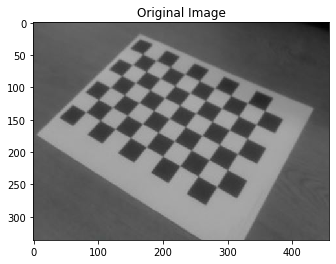

In [18]:
#-*- coding:utf-8-*-
import matplotlib.pyplot as plt
import cv2
from skimage import io
import numpy as np

# Load image file
fpath = 'C:/Users/fxk/PycharmProjects/tenjumh/Computer Vision/Image Mid-Level Vision_Hough/'
image = io.imread(fpath + 'checkerboard.JPG')
image_original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image,50,150,apertureSize=3)

threshold = 100
# Perform the Hough transform
lines = cv2.HoughLines(edges,1,np.pi/180,threshold)
#print(lines)
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
# Original Image
#ax = plt.subplot(1, 3, 1)
#ax.imshow(image_original, cmap='gray', vmin=0, vmax=255)
plt.imshow(image_original, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.show()

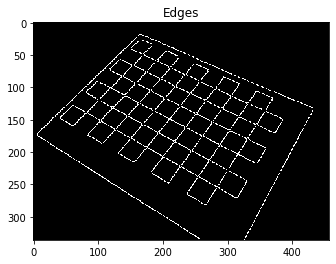

In [19]:
#bx = plt.subplot(1, 3, 2)
#bx.imshow(edges, cmap='gray')
plt.imshow(edges, cmap='gray')
plt.title('Edges')

plt.show()

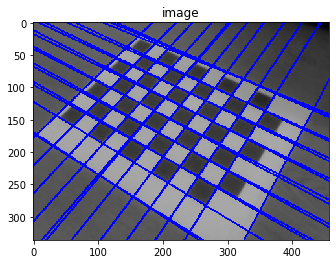

In [20]:
#cx = plt.subplot(1, 3, 3)
#cx.imshow(image, cmap='gray')
plt.imshow(image, cmap='gray')
plt.title('image')

plt.show()

# Probabilistic Hough Transform
- 허프변환은 모든 점에 대해서 계산을 하기 때문에 시간이 많이 소요
- 모든 점을 대상으로 하는 것이 아니라 임의의 점을 이용하여 직선을 찾는 것
- 장점은 선의 시작점과 끝점을 Return해주기 때문에 쉽게 화면에 표현
<br><br>
- <b>cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)</b>
    - image : 8비트, 바이너리이미지, 캔니 엣지를 적용한 이미지
    - rho : dist
    - theta : theta,
    - threshod : 만나는 점의 기준(숫자가 작으면 많은 선이 검출, 그러나 정확도는 낮아짐)
    - minLineLength – 선의 최소 길이. 이 값보다 작으면 reject
    - maxLineGap – 선과 선사이의 최대 허용간격. 이 값보다 작으며 reject.

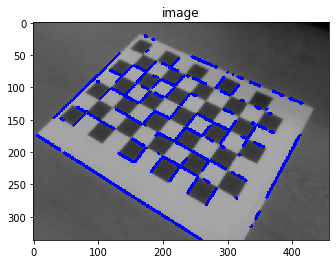

In [21]:
#-*- coding:utf-8-*-
import matplotlib.pyplot as plt
import cv2
from skimage import io
import numpy as np

# Load image file
fpath = 'C:/Users/fxk/PycharmProjects/tenjumh/Computer Vision/Image Mid-Level Vision_Hough/'
image = io.imread(fpath + 'checkerboard.JPG')
image_original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image,50,150,apertureSize=3)

minLineLength = 100
maxLineGap = 0
threshold = 100

lines = cv2.HoughLinesP(edges, 1, np.pi/360, threshold, minLineLength, maxLineGap)
#print(lines)
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        cv2.line(image, (x1, y1), (x2, y2), (0,0,255),3)

plt.imshow(image, cmap='gray')
plt.title('image')

plt.show()